## Imports

In [64]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

In this lab, we work to improve our understanding of global CO$_2$ emission trends for the 10 highest CO$_2$ emitting countries. We will be using the the greenhouse gas emission data set owid-co2-data.csv from Our World in Data. This dataset can be accessed through the OWiD github page here: https://github.com/owid/co2-data

Using graphing tools available to us through Python and open-source data analysis tools pandas, numpy, matplotlib, and seaborn, we will analyize trends in CO$_2$ emissions data for the current top 10 emitters. We will utilize a mix of time plots, box plots, and histograms for our analysis.

Some questions we hope to address in completing this lab include how global CO$_2$ emissions have evolved over the past 50 years, how the CO$_2$ emissions from the 10 largest emitters have evolved over the past 50 years, and how these two trends compare. Additionally, we hope to compare trends between different countries within the top 10 emitters list.



## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

##### Solution

In [65]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [66]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

In [67]:
df = df.loc[df['country'].isin(non_countries) == False]

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

##### Solution

We use the ```head``` method to display the first five rows and all columns of the data frame ```df```.



In [68]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


Using the ```head``` method, we see that there are 74 columns in this dataset characterizing different metrics for greenhouse gas emissions. We also see that the first country listed in the dataset is Afghanistan, and the first year listed is 1850.

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

##### Solution

We use the ```info``` method to display information on the data columns.

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

Using the ```info``` method, we are able to evaluate how many non-null entries are in each column, and the type of data each variable is coded as.

No, there are not any columns where the data type is obviously incorrect. All variables that should be numbers are coded either as int64 or float64 types, and all variables that should be strings are coded as object types.

Yes, some columns have missing values. The highest count is 39,638 for year and country. All other metrics fall somewhere below that number, meaning that somewhere there are missing values for those columns.

##### $\rightarrow$ What years are present in the data set?

##### Solution

We use the ```loc``` method with respect to the ```year``` column to display all years that are present in the data set.

In [70]:
df.loc[:,"year"]

0        1850
1        1851
2        1852
3        1853
4        1854
         ... 
46518    2017
46519    2018
46520    2019
46521    2020
46522    2021
Name: year, Length: 39638, dtype: int64

Years from 1850 to 2021 are present in the data.

## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



##### Solution

We use the ```loc``` method to first define a dataset of all ```co2``` emissions in 2020, and we label this dataset ```co2_2020```. 

Then, we use the ```nlargest``` method to define a dataset of the top 10 largest values for CO$_2$ in 2020 from the ```co2_2020``` dataset. We label this dataset ```top10co2_2020```. 

Printing the ```top10co2_2020``` dataset and looking at the ```country``` column, we are able to determine the 10 countries responsible for the highest CO$_2$ emissions in 2020.

In [71]:
co2_2020 = df.loc[df['year'] == 2020] ##define a dataset of co2 emissions in 2020

In [72]:
top10co2_2020 = co2_2020.nlargest(10, ['co2']) ##define a dataset of top 10 co2 emissions in 2020

In [73]:
top10co2_2020

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8989,China,2020,CHN,1.424930e+09,NaN,858.233,0.602,10956.213,215.217,2.004,...,50.362,1.256,9.103,7.270,14.544,57.893,NaN,NaN,-922.811,-8.423
44221,United States,2020,USA,3.359420e+08,NaN,40.688,0.121,4715.691,-543.453,-10.333,...,14.933,16.606,21.885,2.582,18.311,8.549,NaN,NaN,481.706,10.215
20136,India,2020,IND,1.396387e+09,NaN,122.908,0.088,2445.012,-181.447,-6.908,...,NaN,0.688,1.689,2.680,5.393,NaN,NaN,NaN,-168.131,-6.877
35053,Russia,2020,RUS,1.456173e+08,NaN,20.581,0.141,1624.221,-68.142,-4.026,...,5.754,14.456,10.333,10.591,3.403,5.517,NaN,NaN,-264.073,-16.258
21756,Japan,2020,JPN,1.252448e+08,NaN,24.490,0.196,1042.224,-63.791,-5.768,...,3.107,0.085,2.946,0.038,3.466,2.551,NaN,NaN,144.917,13.905
20552,Iran,2020,IRN,8.729019e+07,NaN,23.855,0.273,729.978,27.020,3.844,...,NaN,6.115,6.005,-0.576,1.999,NaN,NaN,NaN,-71.532,-9.799
36664,Saudi Arabia,2020,SAU,3.599711e+07,NaN,25.593,0.711,661.193,4.711,0.718,...,NaN,1.044,3.445,0.052,3.315,NaN,NaN,NaN,-3.249,-0.491
16794,Germany,2020,DEU,8.332899e+07,NaN,13.357,0.160,639.381,-67.769,-9.583,...,3.054,0.445,2.218,-0.174,2.246,2.646,NaN,NaN,130.111,20.350
20308,Indonesia,2020,IDN,2.718580e+08,NaN,28.203,0.104,609.786,-49.650,-7.529,...,NaN,0.865,0.992,25.370,1.810,NaN,NaN,NaN,14.441,2.368
39259,South Korea,2020,KOR,5.184469e+07,NaN,22.866,0.441,597.634,-48.468,-7.502,...,2.155,0.000,1.544,-0.156,1.475,3.437,NaN,NaN,61.863,10.351


From the ```top10co2_2020``` dataset, we can see that the top 10 emitters of total CO$_2$ are China, United States, India, Russia, Japan, Iran, Saudi Arabia, Germany, Indonesia, and South Korea.

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

##### Solution

We use the ```histplot``` method from seaborn to plot a histogram of total CO$_2$ emissions in 2020. We use ```stat = 'density'``` to make the plot on a density scale.

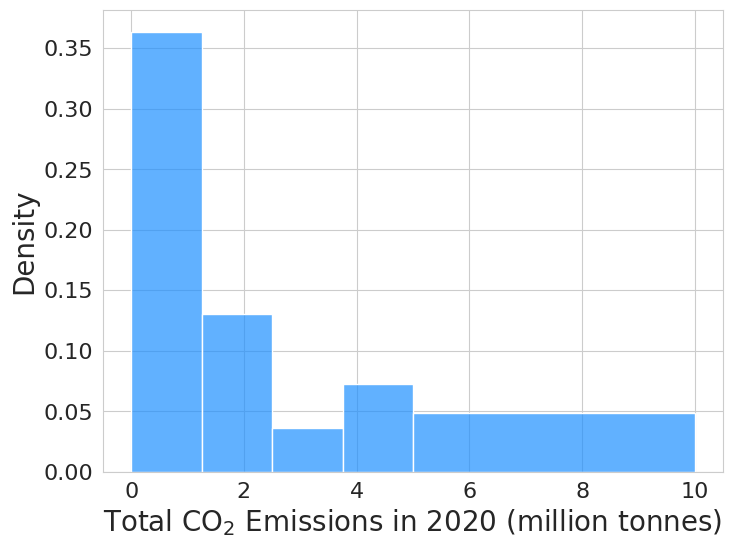

In [74]:
# Set the figure size
plt.figure(figsize = (8,6))

# Produce the histogram
sns.histplot(data = df[df['year'] == 2020], x = 'co2', 
             bins = np.r_[np.linspace(0, 5, 5), 10], color = 'dodgerblue', alpha = 0.7, stat = 'density')

# Label the axes
plt.ylabel('Density',fontsize = 20)
plt.xlabel('Total CO$_2$ Emissions in 2020 (million tonnes)',fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

Using the ```histplot``` method, we produce a histogram on a density scale that shows CO$_2$ emissions in 2020 per country. The histogram shows us that the vast majority of CO$_2$ emissions in 2020 were between 0-2,000 million tonnes. The maximum amount of CO$_2$ emissions produced by a country in 2020 was somewhere around 10,000 million tonnes.

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

##### Solution

We use the ```boxplot``` and ```stripplot``` method from seaborn to plot total CO$_2$ emissions in 2020. We exclude outliers from the boxplot.

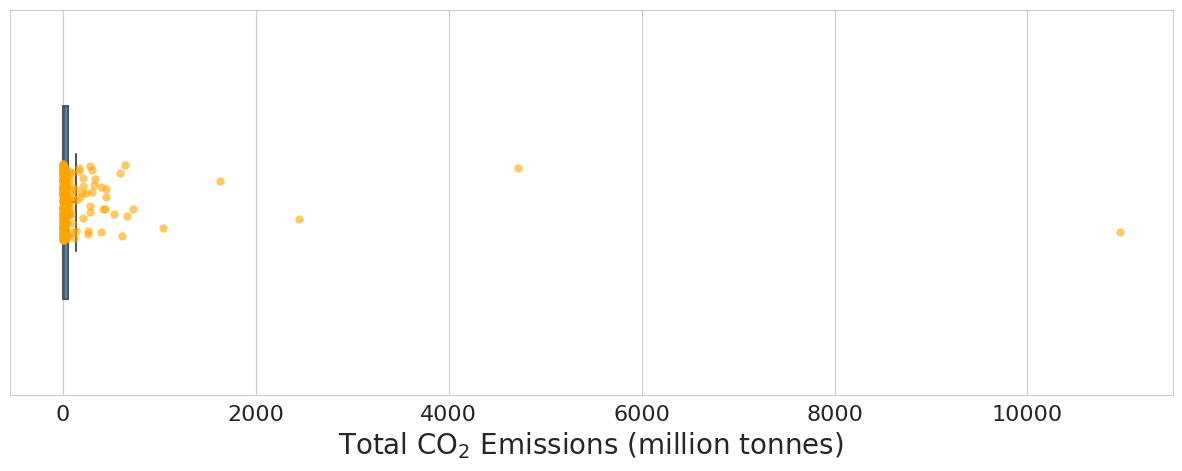

In [75]:
# Figure size
plt.figure(figsize = (15,5))

# Use Seaborn to make the boxplot, but don't show outliers (fliersize = 0)
sns.boxplot(data = df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize = 0)

# Use Seaborn to make the swarm plot
sns.stripplot(data = df[df['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)

# Label axes
plt.xlabel('Total CO$_2$ Emissions (million tonnes)', fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

##### Solution

The boxplot and strip plot show us that the vast majority of CO$_2$ emissions are close to 0. The emissions of the top 10 emitters in 2020, particularly the top 5, are strong outliers in the distribution, as made evident by the boxplot and strip plot. As indicated previously by the histogram, the highest amount of CO$_2$ emissions is about 10,000 million tonnes, making China an extreme outlier.

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

##### Solution

We begin by defining a new dataset, ```df_1971_2020``` with the ```between``` method. This dataset includes all values from the dataframe between the years 1971 and 2020.

Then, we define a dataset, ```top10_1971_2020``` for the top 10 emitters in 2020 over the years 1971 to 2020 by taking data from the previously defined ```df_1971_2020``` dataset for only the top 10 emitter countries. 

We print ```top10_1971_2020``` to ensure that it includes all values for the 10 countries over the span of 50 years - 500 rows in total.

To further explore the new dataset, we use the ```info``` method with ```top10_1971_2020``` to see if there are any missing CO$_2$ values in this dataset.

In [76]:
df_1971_2020 = df[df['year'].between(1971, 2020)] ##define the dataset between the desired years 1971-2020

In [77]:
top10_1971_2020 = df_1971_2020[df_1971_2020['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran',
       'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])] ##define top 10 co2 emitters between years 1971-2020

In [78]:
top10_1971_2020

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
8940,China,1971,CHN,843285440.0,1.216238e+12,13.124,0.016,909.210,101.257,12.533,...,47.962,0.246,0.371,9.174,1.667,70.766,NaN,NaN,NaN,NaN
8941,China,1972,CHN,862840384.0,1.233565e+12,14.717,0.017,968.646,59.436,6.537,...,49.688,0.295,0.452,9.700,1.781,71.925,NaN,NaN,NaN,NaN
8942,China,1973,CHN,881652096.0,1.334375e+12,15.456,0.018,1008.293,39.647,4.093,...,51.343,0.314,0.520,12.852,1.931,72.721,NaN,NaN,NaN,NaN
8943,China,1974,CHN,899367680.0,1.367632e+12,15.340,0.017,1028.100,19.807,1.964,...,52.784,0.418,0.639,10.267,2.252,72.557,NaN,NaN,NaN,NaN
8944,China,1975,CHN,915124672.0,1.460734e+12,19.102,0.021,1183.215,155.115,15.088,...,53.946,0.566,0.752,11.580,2.540,72.942,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44217,United States,2016,USA,327210208.0,1.716256e+13,39.439,0.121,5251.757,-124.820,-2.322,...,15.864,14.418,21.247,1.354,19.125,9.545,5743.85,5974.20,412.188,7.849
44218,United States,2017,USA,329791232.0,1.759628e+13,40.324,0.122,5210.958,-40.800,-0.777,...,15.627,15.114,20.440,1.522,18.907,9.210,5689.61,5918.76,424.355,8.144
44219,United States,2018,USA,332140032.0,1.814065e+13,38.971,0.117,5376.657,165.700,3.180,...,15.370,17.662,21.497,1.936,19.283,8.164,5892.37,6121.63,428.020,7.961
44220,United States,2019,USA,334319680.0,NaN,40.896,0.122,5259.144,-117.513,-2.186,...,15.141,20.121,21.889,2.071,19.107,8.580,5771.00,6001.21,433.339,8.240


In [79]:
top10_1971_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 8940 to 44221
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    500 non-null    object 
 1   year                                       500 non-null    int64  
 2   iso_code                                   500 non-null    object 
 3   population                                 500 non-null    float64
 4   gdp                                        480 non-null    float64
 5   cement_co2                                 500 non-null    float64
 6   cement_co2_per_capita                      500 non-null    float64
 7   co2                                        500 non-null    float64
 8   co2_growth_abs                             500 non-null    float64
 9   co2_growth_prct                            500 non-null    float64
 10  co2_including_luc    

No, the data set is not missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020. From using the ```info``` method, we can see that there are 500 non-null entries for our top 10 emitters and there are 500 ```co2``` non-null entries. This indicates that for every year between 1971 to 2020 for each of the 10 top emitters, there is an accompanying CO$_2$ emission value. This is a complete data set.

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

##### Solution

We begin by re-defining our list of top 10 emitters as ```top10list```, which will be easier to use for the purpose of plotting time plots. 

We use the ```groupby``` method to group ```country``` and ```year``` for the purposes of our time plot.

Finally, we use the ```lineplot``` method from seaborn to create a time plot of total CO$_2$ emissions from 1971 to 2020.

In [80]:
top10list = df[df['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])]

In [81]:
top10list.groupby(['country', 'year'])

<ipython-input-82-f9dbf05bb957>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=top10list[df['country'].isin(top10list['country'])],


Text(0, 0.5, 'Co2 Emissions (million tonnes)')

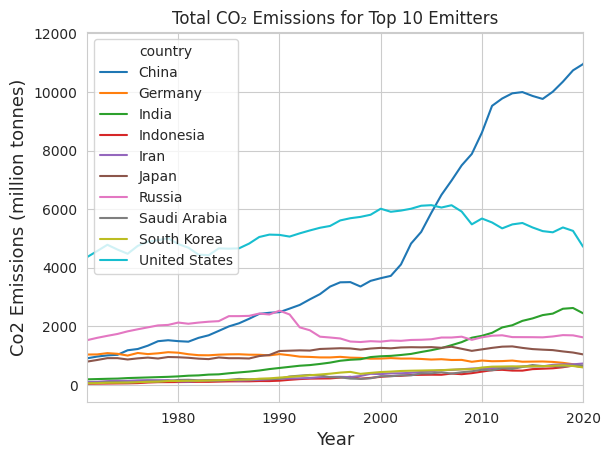

In [82]:
##create lineplot using top 10 emitters from 1971-2020
sns.lineplot(data=top10list[df['country'].isin(top10list['country'])],
             x='year',
             y='co2',
             hue='country')
plt.title('Total CO₂ Emissions for Top 10 Emitters')
plt.xlim(1971, 2020)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Co2 Emissions (million tonnes)', fontsize = 13)

The timeplot for the top 10 emitters from 1971 to 2020 shows us how CO$_2$ emissions have changed for each country over the past 50 years. We see that Russia has experienced a drop in CO$_2$ emissions since 1990, which may be correlated with the collapse of the Soviet Union (1989-1991). Additionally, we can see the sharp increase in emissions from China from 2000 onward, correlating to the West's growing dependence on overseas Chinese manufacturing.

##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

##### Solution

Here, we repeat the ```lineplot``` method but with an additional dataset that we define as ```overall_mean_co2```, which represents the mean CO$_2$ emissions for all countries over the years 1971 to 2020. 

<ipython-input-83-445362162db9>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=top10list[df['country'].isin(top10list['country'])],


Text(0, 0.5, 'CO₂ Emissions (million tonnes)')

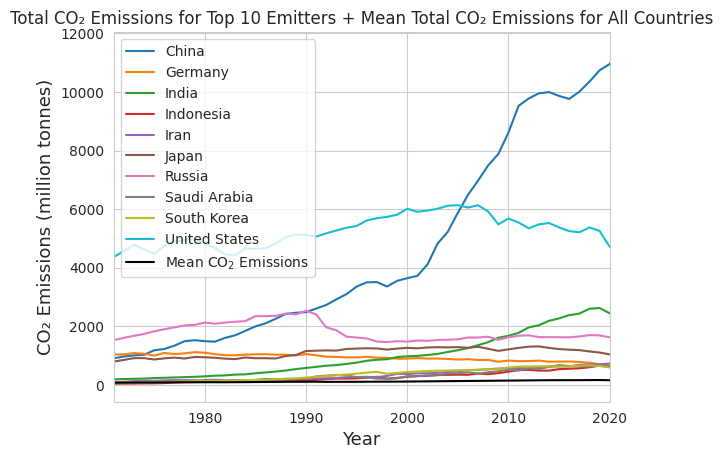

In [83]:
sns.lineplot(data=top10list[df['country'].isin(top10list['country'])],
             x='year',
             y='co2',
             hue='country')

## define the mean total CO2 emissions for all countries to be added to the time plot 
overall_mean_co2 = df.groupby('year')['co2'].mean()

sns.lineplot(data=overall_mean_co2, color='black', label='Mean CO$_2$ Emissions')

plt.xlim(1971, 2020)
plt.title('Total CO₂ Emissions for Top 10 Emitters + Mean Total CO₂ Emissions for All Countries')
plt.xlabel('Year', fontsize=13)
plt.ylabel('CO₂ Emissions (million tonnes)', fontsize=13)

Adding the mean CO$_2$ emissions for all countries to our time plot, we see again how the top 10 emitters are extreme outliers. When accounting for the emissions of the other countries, we see that the mean remains below the top 10 emissions, indicating that the other countries produce significantly less emissions. However, there is still an upward trend for the mean CO$_2$ emissions from 1971-2020.

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

##### Solution

Here, we simply use the ```plt.yscale``` method to plot the y-axis on a log scale.

<ipython-input-84-ba2869faeb8b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(data=top10list[df['country'].isin(top10list['country'])],


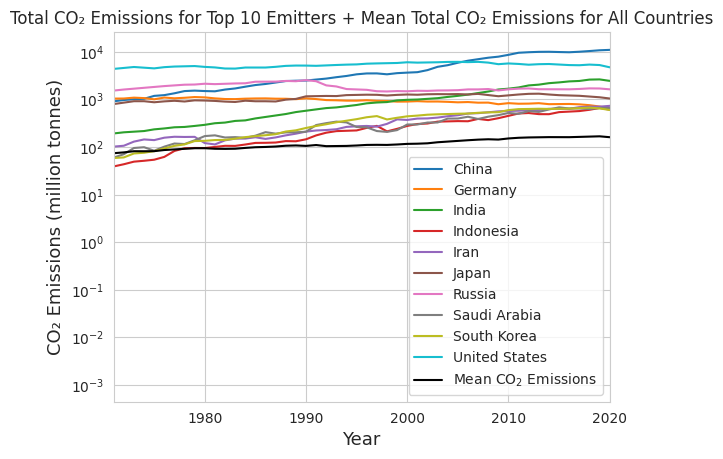

In [84]:
sns.lineplot(data=top10list[df['country'].isin(top10list['country'])],
             x='year',
             y='co2',
             hue='country')

overall_mean_co2 = df.groupby('year')['co2'].mean()

sns.lineplot(data=overall_mean_co2, color='black', label='Mean CO$_2$ Emissions')

plt.xlim(1971, 2020)
plt.title('Total CO₂ Emissions for Top 10 Emitters + Mean Total CO₂ Emissions for All Countries')
plt.xlabel('Year', fontsize=13)
plt.ylabel('CO₂ Emissions (million tonnes)', fontsize=13)
plt.yscale("log") ##Plot the y-axis on a log scale

Here we can better see the upward trend of the mean CO$_2$ emissions for all countries. We also see how some countries, such as the United States and Germany, are not increasing emissions as dramatically as other countries such as China or Indonesia. We can see that countries in The Global South are generally increasing their CO$_2$ emissions more dramatically than countries in the Global North.

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

From our analysis, we see that the overall global trend of CO$_2$ emissions is increasing. However, we also see that there are large disparities between countries in the amount of CO$_2$ that is being emitted. 

China emits significantly more CO$_2$ emissions than other countries, including those in the top 10 emitters list. Additionally, China has seen one of the most dramatic increases in emissions over the past 50 years.

 Within the top 10 emitters list, we see that countries in the Global North have consistently high CO$_2$ emissions over the past 50 years, but with minor to no decrease. In contrast, countries in the Global South are more likely to be increasing their CO$_2$ emissions. 
 
 This is logical, given that these countries are developing emission-producing infrastructure rapidly and there is a growing demand for overseas manufacturing in Global South countries from Global North countries.